In [16]:
import pandas as pd
import os
import missingno as msno
import numpy as np
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [18]:
path = os.path.join("/home/eneko/Documentos/RETO_06/datos/df_limpio.csv")
reservas = pd.read_csv(path)
reservas

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,momento_checkin,ratio_asistencia,ratio_cancelaciones_mes_respecto_reservas,zona_roja,estacion_estancia,estacion_reserva,antiguedad_hotel_en_dias,es_festivo,es_finde,city
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.251273,1,invierno,otoño,2110,False,False,Donostia
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.251273,1,invierno,invierno,2110,True,False,Donostia
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,antes,0.333333,0.251273,1,invierno,otoño,2110,True,False,Donostia
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,antes,0.500000,0.251273,1,invierno,otoño,2110,False,False,Donostia
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,antes,1.000000,0.251273,1,invierno,otoño,2110,False,False,Donostia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,2023-10-10 20:53:00,2023-12-31 15:00:00,2024-01-01 11:00:00,82,1,December,Sunday,4,0,channel_manager,...,cancelacion,0.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona
52095,2023-10-13 13:38:00,2023-12-31 15:00:00,2024-01-01 11:00:00,79,1,December,Sunday,4,0,telephone,...,antes,1.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona
52096,2023-10-17 08:36:00,2023-12-31 15:00:00,2024-01-01 11:00:00,75,1,December,Sunday,5,0,direct_channel,...,antes,1.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona
52097,2023-10-17 08:36:00,2023-12-31 15:00:00,2024-01-01 11:00:00,75,1,December,Sunday,4,0,direct_channel,...,antes,1.000000,0.239947,0,invierno,otoño,1198,False,False,Pamplona


In [19]:
meteorologia = pd.read_csv("/home/eneko/Documentos/RETO_06/datos/meteo.csv",decimal=',',na_values=['', 'NA', 'NaN', None])
meteorologia

,Unnamed: 0,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,city
0,0,2023-01-01,1082,BILBAO AEROPUERTO,BIZKAIA,42,19.2,"5,1",13.4,23:20,...,1014.9,00,1008.5,16,36.0,92.0,23:59,26.0,15:24,Bilbao
1,1,2023-01-02,1082,BILBAO AEROPUERTO,BIZKAIA,42,9.8,"0,0",5.0,23:57,...,1025.8,Varias,1012.2,00,80.0,95.0,Varias,53.0,13:58,Bilbao
2,2,2023-01-03,1082,BILBAO AEROPUERTO,BIZKAIA,42,9.1,"0,0",3.2,05:27,...,1029.5,Varias,1025.4,01,76.0,97.0,07:00,43.0,14:51,Bilbao
3,3,2023-01-04,1082,BILBAO AEROPUERTO,BIZKAIA,42,10.6,"0,0",3.4,06:09,...,1031.2,Varias,1028.5,15,72.0,89.0,Varias,46.0,14:14,Bilbao
4,4,2023-01-05,1082,BILBAO AEROPUERTO,BIZKAIA,42,11.5,"0,0",5.3,23:33,...,1029.3,00,1021.7,20,72.0,93.0,Varias,48.0,13:17,Bilbao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,5503,2024-08-27,9263D,"PAMPLONA, AEROPUERTO",NAVARRA,459,22.2,"0,0",12.5,04:38,...,965.3,00,961.9,13,NaN,94.0,05:15,37.0,15:55,Pamplona
5504,5504,2024-08-28,9263D,"PAMPLONA, AEROPUERTO",NAVARRA,459,27.5,"0,0",19.4,23:59,...,964.8,23,959.5,16,NaN,85.0,Varias,29.0,12:58,Pamplona
5505,5505,2024-08-29,9263D,"PAMPLONA, AEROPUERTO",NAVARRA,459,22.9,"13,4",17.3,08:13,...,968.3,Varias,962.8,17,81.0,98.0,Varias,58.0,14:11,Pamplona
5506,5506,2024-08-30,9263D,"PAMPLONA, AEROPUERTO",NAVARRA,459,23.4,"10,3",17.6,03:57,...,965.4,00,962.1,17,NaN,97.0,Varias,53.0,13:17,Pamplona


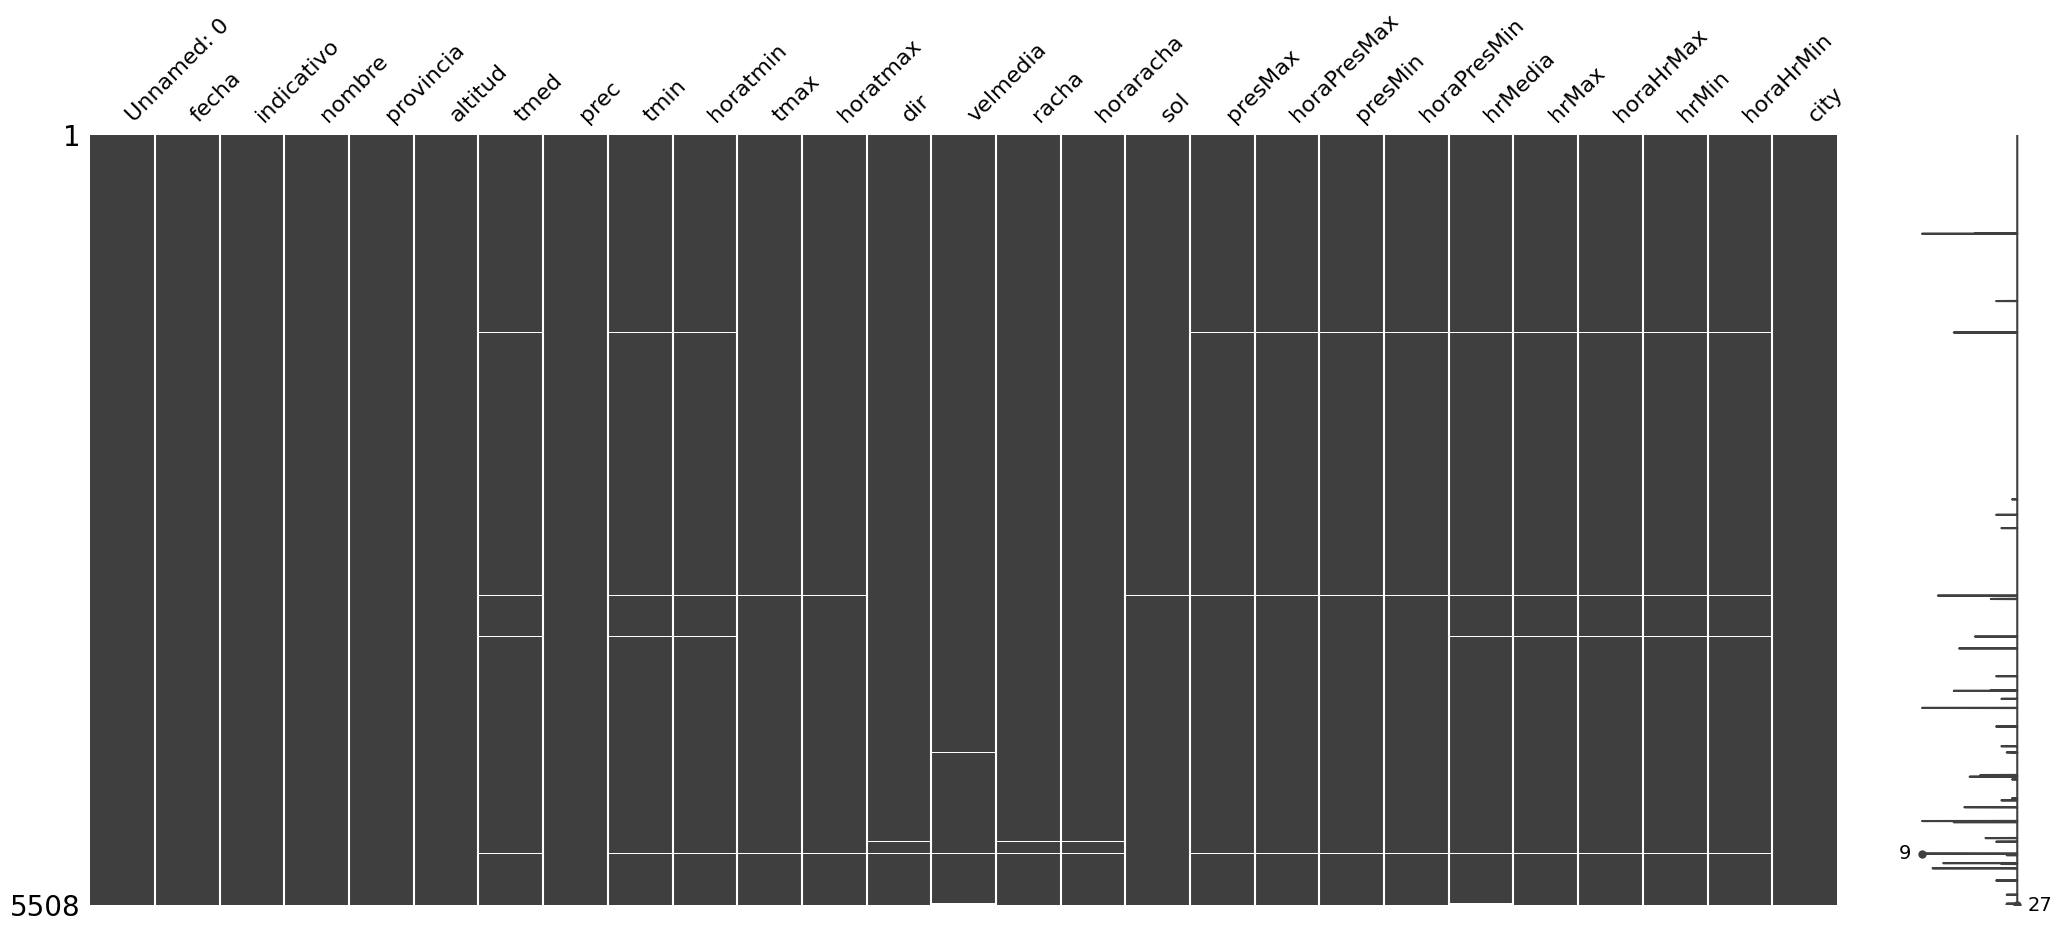

In [ ]:
msno.matrix(meteorologia)

In [22]:
meteorologia.isna().sum()

Unnamed: 0      0
fecha           0
indicativo      0
nombre          0
provincia       0
altitud         0
tmed           16
prec            0
tmin           16
horatmin       16
tmax           10
horatmax       10
dir            17
velmedia       19
racha          17
horaracha      17
sol             7
presMax        14
horaPresMax    14
presMin        14
horaPresMin    14
hrMedia        28
hrMax          22
horaHrMax      22
hrMin          21
horaHrMin      21
city            0
dtype: int64

In [23]:
#VER DUPLICADOS
columnas_duplicados = ['city', 'fecha']
duplicados = meteorologia[meteorologia.duplicated(subset=columnas_duplicados, keep=False)]
duplicados

,Unnamed: 0,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,city
180,180,2023-06-30,1082,BILBAO AEROPUERTO,BIZKAIA,42,18.4,"0,4",14.5,03:43,...,1020.2,Varias,1017.2,24,73.0,93.0,Varias,55.0,14:41,Bilbao
181,181,2023-06-30,1082,BILBAO AEROPUERTO,BIZKAIA,42,18.4,"0,4",14.5,03:43,...,1020.2,Varias,1017.2,24,73.0,93.0,Varias,55.0,14:41,Bilbao
361,361,2023-12-27,1082,BILBAO AEROPUERTO,BIZKAIA,42,12.0,"0,0",4.4,00:17,...,1017.2,Varias,1013.0,15,27.0,77.0,00:18,22.0,13:42,Bilbao
362,362,2023-12-27,1082,BILBAO AEROPUERTO,BIZKAIA,42,12.0,"0,0",4.4,00:17,...,1017.2,Varias,1013.0,15,27.0,77.0,00:18,22.0,13:42,Bilbao
542,542,2024-06-24,1082,BILBAO AEROPUERTO,BIZKAIA,42,20.0,"0,0",15.1,23:56,...,1015.2,00,1009.0,24,69.0,99.0,Varias,49.0,14:00,Bilbao
543,543,2024-06-24,1082,BILBAO AEROPUERTO,BIZKAIA,42,20.0,"0,0",15.1,23:56,...,1015.2,00,1009.0,24,69.0,99.0,Varias,49.0,14:00,Bilbao
792,792,2023-06-30,1014A,DONOSTIA / SAN SEBASTIÁN AEROPUERTO,GIPUZKOA,4,20.4,"0,0",17.6,01:59,...,1023.2,Varias,1020.5,24,58.0,93.0,00:43,50.0,13:40,Donostia
793,793,2023-06-30,1014A,DONOSTIA / SAN SEBASTIÁN AEROPUERTO,GIPUZKOA,4,20.4,"0,0",17.6,01:59,...,1023.2,Varias,1020.5,24,58.0,93.0,00:43,50.0,13:40,Donostia
973,973,2023-12-27,1014A,DONOSTIA / SAN SEBASTIÁN AEROPUERTO,GIPUZKOA,4,11.6,"0,0",2.2,05:31,...,1020.5,00,1016.3,12,51.0,95.0,00:01,19.0,12:34,Donostia
974,974,2023-12-27,1014A,DONOSTIA / SAN SEBASTIÁN AEROPUERTO,GIPUZKOA,4,11.6,"0,0",2.2,05:31,...,1020.5,00,1016.3,12,51.0,95.0,00:01,19.0,12:34,Donostia


In [24]:
#ELIMINAR DUPLICADOS
columnas_duplicados = ['city', 'fecha']
meteorologia = meteorologia.drop_duplicates(subset=columnas_duplicados, keep='first')
duplicados = meteorologia[meteorologia.duplicated(subset=columnas_duplicados, keep=False)]
duplicados

,Unnamed: 0,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,city


In [25]:
#Columnas a eliminar
columnas_a_eliminar = [
    'indicativo',      
    'horatmin',       
    'horatmax',       
    'horaracha',      
    'horaPresMax',     
    'horaPresMin',     
    'horaHrMax',       
    'horaHrMin',       
    'nombre',          
]

#Solo eliminar las que existen en el dataframe
columnas_existentes = [col for col in columnas_a_eliminar if col in meteorologia.columns]

#Eliminar columnas
meteorologia = meteorologia.drop(columns=columnas_existentes)

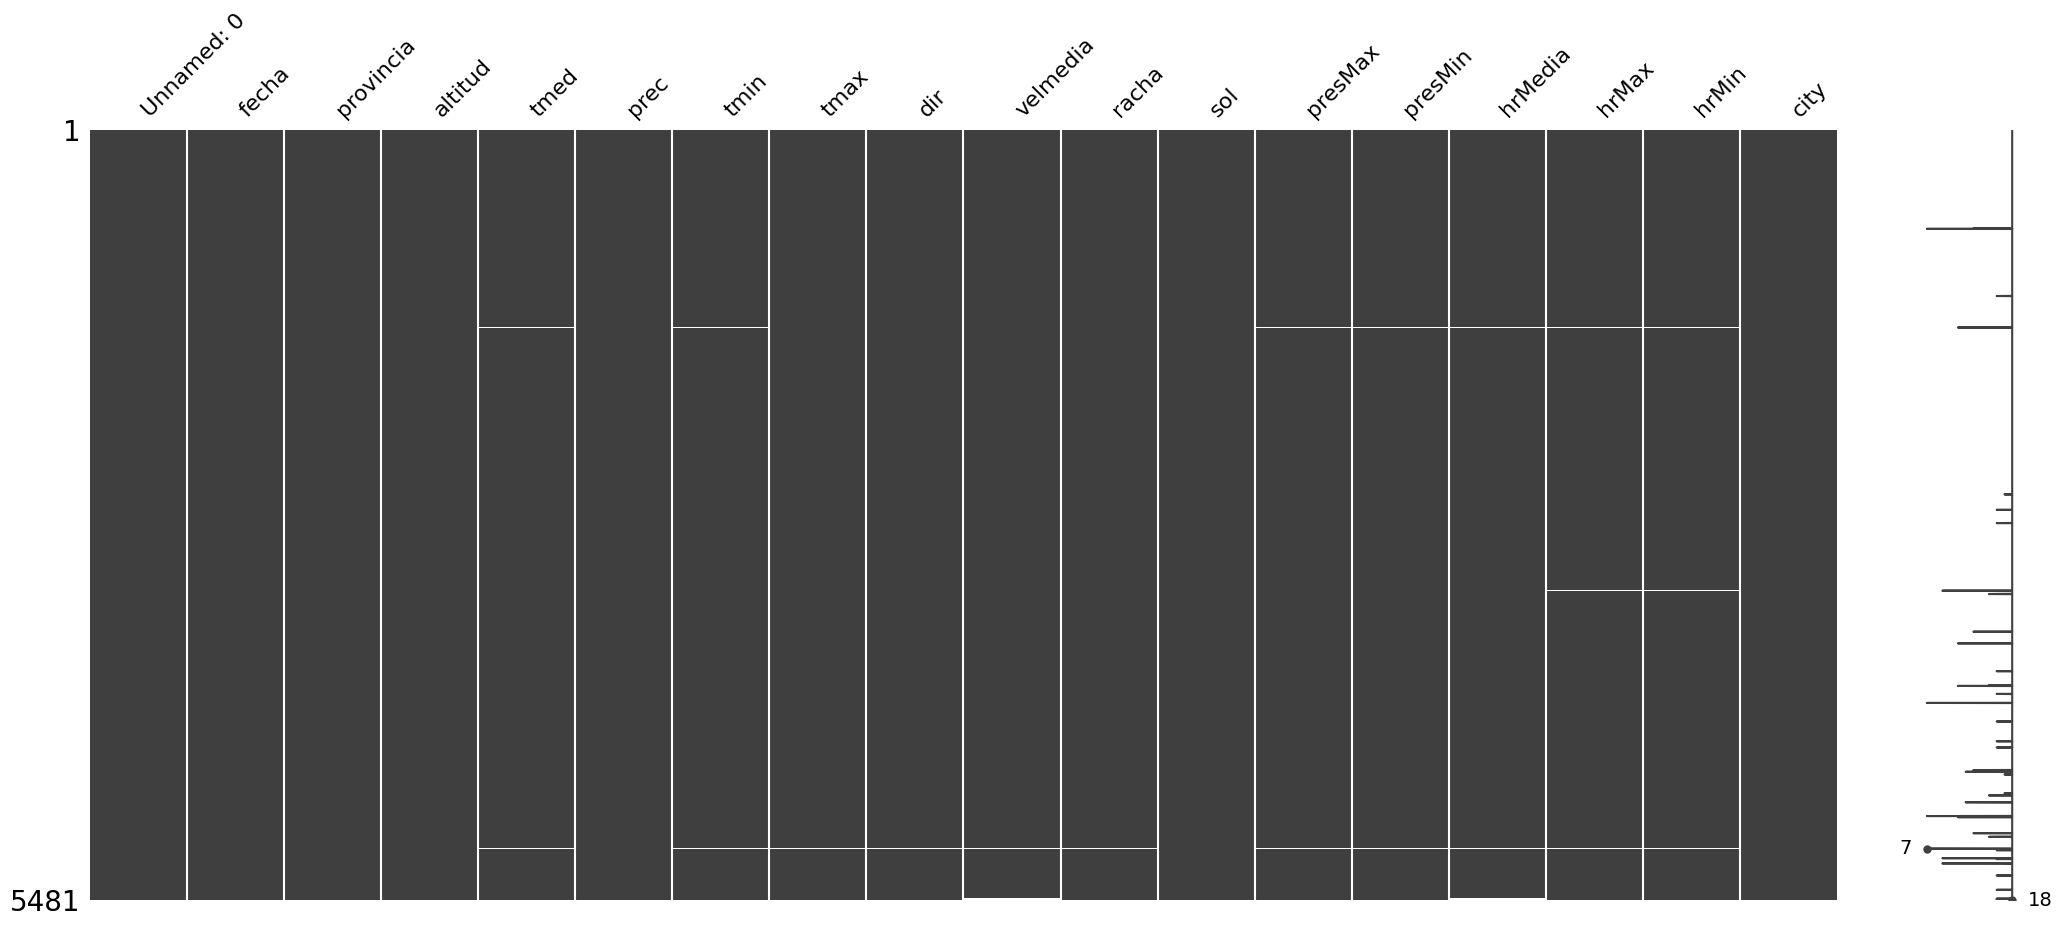

In [ ]:
msno.matrix(meteorologia)

In [27]:
meteorologia.isna().sum()


Unnamed: 0     0
fecha          0
provincia      0
altitud        0
tmed          16
prec           0
tmin          16
tmax          10
dir           17
velmedia      19
racha         17
sol            7
presMax       14
presMin       14
hrMedia       28
hrMax         22
hrMin         21
city           0
dtype: int64

In [28]:
df_con_na = meteorologia[meteorologia.isna().any(axis=1)]
df_con_na

,Unnamed: 0,fecha,provincia,altitud,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin,hrMedia,hrMax,hrMin,city
703,703,2023-04-02,GIPUZKOA,4,12.5,"16,1",11.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,83.0,96.0,66.0,Donostia
706,706,2023-04-05,GIPUZKOA,4,NaN,"0,0",NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,Donostia
1187,1187,2024-07-26,GIPUZKOA,4,23.0,"0,2",21.3,24.6,8.0,2.2,7.8,0.0,NaN,NaN,76.0,88.0,71.0,Donostia
1412,1412,2023-07-07,ARABA/ALAVA,513,NaN,"0,4",NaN,30.3,13.0,3.1,9.2,10.2,NaN,NaN,NaN,NaN,NaN,Vitoria
2605,2605,2023-06-07,MADRID,609,18.8,"6,9",15.8,21.7,14.0,2.5,9.2,NaN,947.4,945.0,85.0,96.0,54.0,Madrid
2716,2716,2023-09-25,MADRID,609,19.6,"0,0",10.0,29.1,15.0,1.4,2.8,10.1,954.4,950.9,49.0,NaN,NaN,Madrid
2811,2811,2023-12-28,MADRID,609,2.9,"0,0",-2.2,8.0,NaN,0.3,NaN,1.2,959.0,956.9,82.0,98.0,62.0,Madrid
3293,3293,2023-08-21,MALAGA,7,27.0,"0,0",23.9,30.2,12.0,3.9,8.3,11.5,1019.0,1016.0,64.0,NaN,NaN,Málaga
3294,3294,2023-08-22,MALAGA,7,NaN,"0,0",NaN,NaN,11.0,3.6,8.9,NaN,NaN,NaN,NaN,NaN,NaN,Málaga
3295,3295,2023-08-23,MALAGA,7,30.2,"0,0",26.6,33.9,13.0,4.4,9.7,NaN,NaN,NaN,NaN,NaN,NaN,Málaga


In [29]:
#1. Identificar columnas numéricas para imputación
all_cols = meteorologia.columns.tolist()
exclude = all_cols[:4] + [all_cols[-1]]
numeric_cols = meteorologia.select_dtypes(include=[np.number]).columns.tolist()
cols_to_impute = [col for col in numeric_cols if col not in exclude]

#2. Contar missing values y eliminar registros con >50% missing
meteorologia['na_count'] = meteorologia[cols_to_impute].isna().sum(axis=1)
total_meteo_cols = len(cols_to_impute)
umbral_eliminar = total_meteo_cols // 2

registros_a_eliminar = meteorologia['na_count'] > umbral_eliminar
meteorologia = meteorologia[~registros_a_eliminar].copy()

print(f"Eliminados {registros_a_eliminar.sum()} registros con >50% missing")

#3. Imputar variables meteorológicas
for col in cols_to_impute:
    if meteorologia[col].isna().any():
        meteorologia[col] = meteorologia[col].fillna(
            meteorologia.groupby('city')[col].transform('mean')
        )
        meteorologia[col] = meteorologia[col].fillna(meteorologia[col].mean())

#4. Eliminar columna temporal
meteorologia = meteorologia.drop('na_count', axis=1)

print(f"Imputación completada. Registros finales: {len(meteorologia)}")

Eliminados 7 registros con >50% missing
Imputación completada. Registros finales: 5474


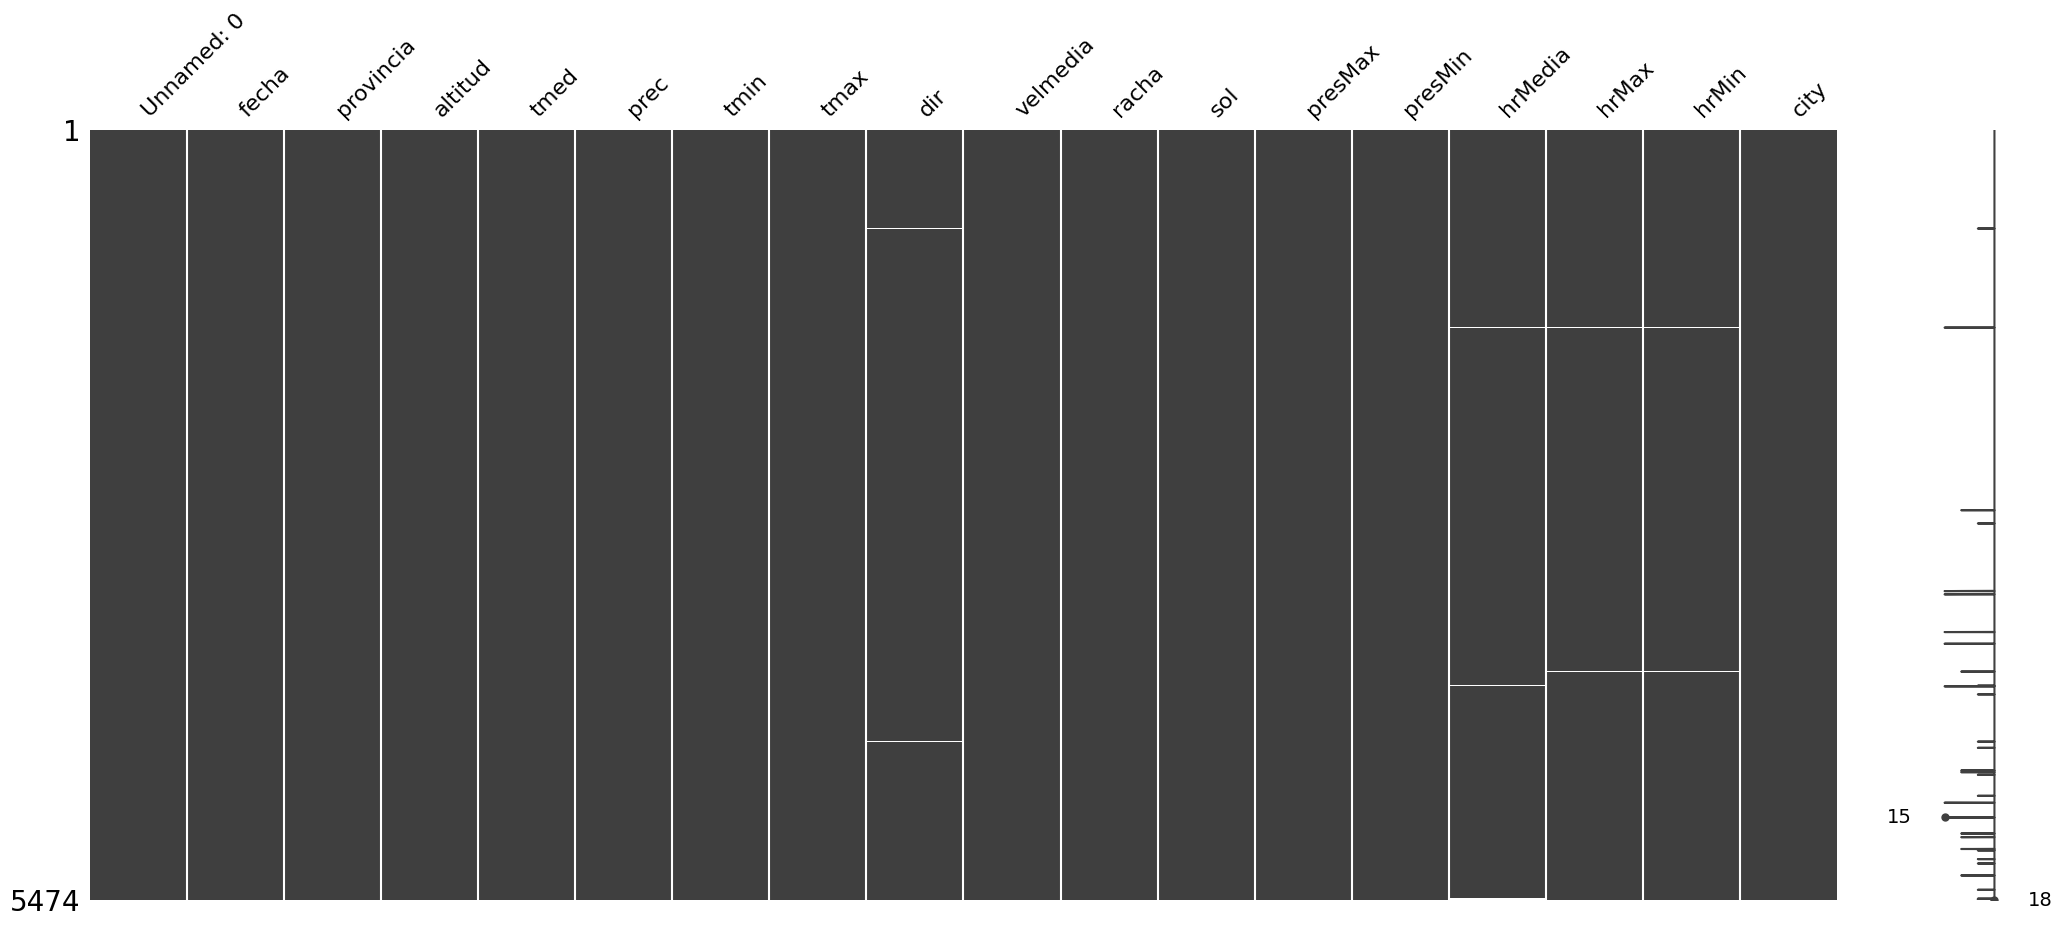

In [30]:
msno.matrix(meteorologia)
plt.savefig('/home/eneko/Imágenes/missing3.png')

In [31]:
meteorologia.isna().sum()

Unnamed: 0     0
fecha          0
provincia      0
altitud        0
tmed           0
prec           0
tmin           0
tmax           0
dir           11
velmedia       0
racha          0
sol            0
presMax        0
presMin        0
hrMedia       22
hrMax         15
hrMin         15
city           0
dtype: int64

In [32]:
# onvertir todas las columnas numéricas que estén como strings
for col in meteorologia.columns:
    if meteorologia[col].dtype == 'object':  # Si es string
        # Reemplazar comas por puntos
        meteorologia[col] = meteorologia[col].astype(str).str.replace(',', '.')
        # Intentar convertir a número
        meteorologia[col] = pd.to_numeric(meteorologia[col], errors='ignore')

#Verificar tipos de datos después
print("\nTipos de datos después de la conversión:")
print(meteorologia.dtypes)

#Verificar valores de ejemplo
print("\nValores de ejemplo (primeras filas):")
for col in meteorologia.select_dtypes(include=[np.number]).columns[:5]:
    print(f"{col}: {meteorologia[col].head(3).tolist()}")


Tipos de datos después de la conversión:
Unnamed: 0      int64
fecha          object
provincia      object
altitud         int64
tmed          float64
prec           object
tmin          float64
tmax          float64
dir            object
velmedia      float64
racha         float64
sol           float64
presMax       float64
presMin       float64
hrMedia        object
hrMax          object
hrMin          object
city           object
dtype: object

Valores de ejemplo (primeras filas):
Unnamed: 0: [0, 1, 2]
altitud: [42, 42, 42]
tmed: [19.2, 9.8, 9.1]
tmin: [13.4, 5.0, 3.2]
tmax: [25.1, 14.7, 15.0]


In [33]:
#Convertir las tres columnas a formato año-mes-dia
reservas['checkin_time'] = pd.to_datetime(reservas['checkin_time']).dt.strftime('%Y-%m-%d')
reservas['checkout_time'] = pd.to_datetime(reservas['checkout_time']).dt.strftime('%Y-%m-%d')
reservas['booked_at'] = pd.to_datetime(reservas['booked_at']).dt.strftime('%Y-%m-%d')

In [34]:
meteorologia.to_csv(
    "/home/eneko/Documentos/RETO_06/datos/meteo_limpio.csv",
    index=False
)

In [35]:
reservas.to_csv(
    "/home/eneko/Documentos/RETO_06/datos/reservas.csv",
    index=False
)